In [1]:
#1,datos
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
datos=pd.read_csv('Datos.csv')
datos2=pd.read_csv('Datos2.csv')
datos3=pd.read_csv('Datos3.csv')
Δx=0.01/2
Δt=0.0001/2
g=9.78#m/s**2
print('Estos son son los datos(el disco y el carro estan a velocidad constante):')
print('                       ')
print(datos2)
print('-----------------------------------------------------------------------')
print('Estos son son los datos(el disco empieza a deslizar):')
print('                       ')
print(datos)
print('                       ')
print('-----------------------------------------------------------------------')
print('Estos son son los datos(el carro retrocede):')
print('                       ')
print(datos3)
print('                       ')
print('Nota:El tiempo se contabiliza independientemente en cada situación.')
print('                       ')
print('Se toma la gravedad(g) como 9.78m/s**2')
print(' ')
print('Las incertidumbres para amabas situaciones son:')
print('                       ')
print('Incertidumbre tiempo(Δt):',Δt,'s')
print('Incertidumbre posición(Δm):',Δx,'m')




Estos son son los datos(el disco y el carro estan a velocidad constante):
                       
      t(s)  x(m)
0   0.0000  0.00
1   0.0167  0.01
2   0.0333  0.02
3   0.0542  0.03
4   0.0708  0.04
5   0.0875  0.05
6   0.1083  0.06
7   0.1250  0.07
8   0.1417  0.08
9   0.1625  0.09
10  0.1792  0.10
11  0.2000  0.11
12  0.2167  0.12
13  0.2333  0.13
14  0.2542  0.14
15  0.2708  0.15
16  0.2917  0.16
17  0.3083  0.17
18  0.3250  0.18
19  0.3458  0.19
20  0.3625  0.20
-----------------------------------------------------------------------
Estos son son los datos(el disco empieza a deslizar):
                       
      t(s)  x(m)
0   0.0000  0.00
1   0.0167  0.01
2   0.0375  0.02
3   0.0583  0.03
4   0.0792  0.04
5   0.1042  0.05
6   0.1292  0.06
7   0.1583  0.07
8   0.1917  0.08
9   0.2333  0.09
10  0.3000  0.10
                       
-----------------------------------------------------------------------
Estos son son los datos(el carro retrocede):
                       
      t(s

In [2]:
#2,distancia recorrida sobre la mesa por el disco
d=datos['x(m)'].tolist()[-1]
print('La distancia que recorrió el disco en la mesa es: (',d,'+-',Δx,')m')

La distancia que recorrió el disco en la mesa es: ( 0.1 +- 0.005 )m


Haciendo una ajuste lineal (el mejor ajuste de acuerdo al fenómeno y los datos es el lineal.):
El ajuste es x(t)=mt+b,tiene como parametros:
 
m=(0.55+-0.001)m/s, b=(0.00108+-0.0003)m.
 
Del MR, la velocidad es igual a m.
Por ende la velocidad inicial del disco(vo) es:( 0.55 +- 0.001 )m/s
----------------------------------
Gráficando y comparando con los puntos obtenidos por los datos, tenemos:


Text(0.5, 0, 't(s).')

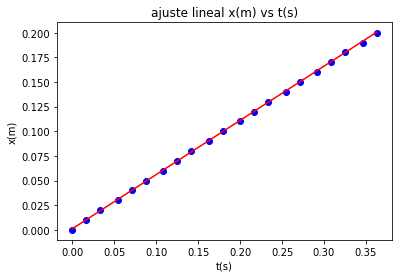

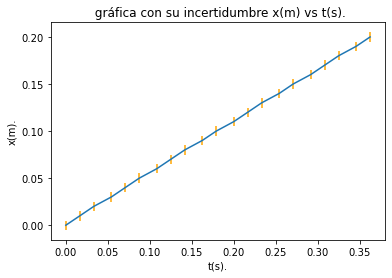

In [3]:
#punto 3,ajuste lineal y gráfica de la situación de velocidad constante del disco
print('Haciendo una ajuste lineal (el mejor ajuste de acuerdo al fenómeno y los datos es el lineal.):')
fig,ax=plt.subplots()
def func(x, m, b):
    return m*x+b
ajuste,covarianza= curve_fit(func,datos2['t(s)'].tolist(),datos2['x(m)'].tolist())
desviacionestandar=np.sqrt(np.diag(covarianza))
m=round(ajuste[0],2)
b=round(ajuste[1],5)
Δm=round(desviacionestandar[0],3)
Δb=round(desviacionestandar[1],4)
print('El ajuste es x(t)=mt+b,tiene como parametros:')
print(' ')
print(str('m=(')+str(m)+str('+-')+str(Δm)+str(')m/s,'),str('b=(')+str(b)+str('+-')+str(Δb)+str(')m.'))
print(' ')
print('Del MR, la velocidad es igual a m.')
print('Por ende la velocidad inicial del disco(vo) es:(',m,'+-',Δm,')m/s')
print('----------------------------------')
print('Gráficando y comparando con los puntos obtenidos por los datos, tenemos:')
x1=datos2['t(s)'].tolist()[0]
x2=datos2['t(s)'].tolist()[-1]
x=np.linspace(x1,x2,1000)
ax.plot(x,func(x,m,b),color='red')
ax.scatter(datos2['t(s)'],datos2['x(m)'],color='blue')
ax.set_title('ajuste lineal x(m) vs t(s)')
ax.set_ylabel('x(m)')
ax.set_xlabel('t(s)')

fig,ax=plt.subplots()
ax.errorbar(datos2['t(s)'],datos2['x(m)'],xerr=Δt,yerr=Δx,ecolor='orange')
ax.set_title(' gráfica con su incertidumbre x(m) vs t(s).')
ax.set_ylabel('x(m).')
ax.set_xlabel('t(s).')





In [4]:
#punto 3calculando coeficiente de fricción
#punto 4calculando incertidumbre coeficiente de fricción
#según las ecuaciones dadas uk=(mv**2/2*N*d), la normal en este caso es igual al peso, por ende uk=(v**2/2gd)
#derivando parcialmente,aciendo una aproximación lineal y reacomodando tenemos:
#Δuk1=sqrt((Δd/d)**2+(2Δv/v)**2)
v=m
Δv=Δm
Δd=Δx
uk=round((v**2)/(2*g*d),2)
Δuk=round((uk)*(((Δd/d)**2+(2*Δv/v)**2))**(1/2),2)
print('EL coeficiente de fricción(obtenido con energía) es:(',uk,'+-',Δuk,')')

EL coeficiente de fricción(obtenido con energía) es:( 0.15 +- 0.01 )


Haciendo una ajuste(el mejor ajuste de acuerdo al fenómeno y los datos es el cuadrático):
El ajuste es x(t)=at**2+b*t+c,tiene como parametros:
 
a=(-0.76+-0.01)m/s**2, b=(0.56+-0.004)m/s, c=(0.0+-0.0)m
 
Del MRU, (1/2)aceleración=a, por lo tanto:aceleración=2*a
 
Por ende la aceleración del disco es: ( -1.52 +- 0.02 )m/s**2
----------------------------------
Gráficando y comparando con los puntos obtenidos por los datos, tenemos


Text(0.5, 0, 't(s)')

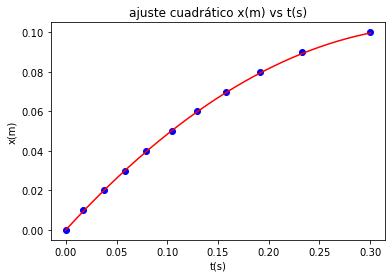

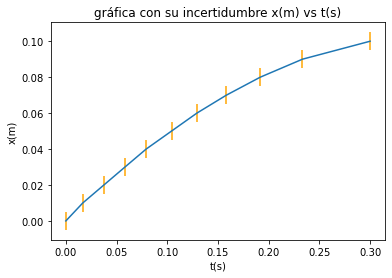

In [5]:
#punto 5, ajuste cuadrático y gráfica de la situación acelerada del disco
#PUNTO 1
print('Haciendo una ajuste(el mejor ajuste de acuerdo al fenómeno y los datos es el cuadrático):')
fig,ax=plt.subplots()
def func(x, a, b, c):
    return a*(x**2)+b*x+c
ajuste,covarianza= curve_fit(func,datos['t(s)'].tolist(),datos['x(m)'].tolist())
desviacionestandar=np.sqrt(np.diag(covarianza))
a=round(ajuste[0],2)
b=round(ajuste[1],2)
c=round(ajuste[2],2)
Δa=round(desviacionestandar[0],2)
Δb=round(desviacionestandar[1],3)
Δc=round(desviacionestandar[2],2)
aceleracion=2*a
Δaceleracion=2*Δa
print('El ajuste es x(t)=at**2+b*t+c,tiene como parametros:')
print(' ')
print(str('a=(')+str(a)+str('+-')+str(Δa)+str(')m/s**2,'),str('b=(')+str(b)+str('+-')+str(Δb)+str(')m/s,'),str('c=(')+str(c)+
      str('+-')+str(Δc)+str(')m'))
print(' ')
print('Del MRU, (1/2)aceleración=a, por lo tanto:aceleración=2*a')
print(' ')
print('Por ende la aceleración del disco es: (',aceleracion,'+-',Δaceleracion,')m/s**2')
print('----------------------------------')
print('Gráficando y comparando con los puntos obtenidos por los datos, tenemos')
x1=datos['t(s)'].tolist()[0]
x2=datos['t(s)'].tolist()[-1]
x=np.linspace(x1,x2,1000)
ax.plot(x,func(x,a,b,c),color='red')
ax.scatter(datos['t(s)'],datos['x(m)'],color='blue')
ax.set_title('ajuste cuadrático x(m) vs t(s)')
ax.set_ylabel('x(m)')
ax.set_xlabel('t(s)')

fig,ax=plt.subplots()
ax.errorbar(datos['t(s)'],datos['x(m)'],xerr=Δt,yerr=Δx,ecolor='orange')
ax.set_title('gráfica con su incertidumbre x(m) vs t(s)')
ax.set_ylabel('x(m)')
ax.set_xlabel('t(s)')

In [6]:
#punto 5, coeficiente de fricción, utilizando la ecuación de la guia uk=aceleración/g, adicionalmente derivando parcialmente y 
#haciendo una aproximación lineal, obtenemos el error Δuk=(1/g)Δaceleración
uk=round(aceleracion/g,2)
Δuk=round((1/g)*Δaceleracion,3)
print('El coeficiente de fricción(obtenido mediante analisís de fuerzas) es:(',uk,'+-',Δuk,')')



El coeficiente de fricción(obtenido mediante analisís de fuerzas) es:( -0.16 +- 0.002 )


Haciendo una ajuste lineal (el mejor ajuste de acuerdo al fenómeno y los datos es el lineal.):
El ajuste es x(t)=mt+b,tiene como parametros:
 
m=(-0.36+-0.002)m/s, b=(0.2+-0.0005)m.
 
Del MR, la velocidad es igual a m
 
Por ende la velocidad del carro(v) del choque es:( -0.36 +- 0.002 )m/s
La velocidad negativa indica que el carro esta retrociendo
----------------------------------
Gráficando y comparando con los puntos obtenidos por los datos, tenemos:


Text(0.5, 0, 't(s)')

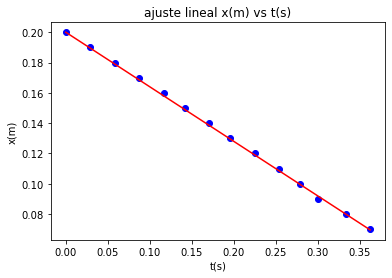

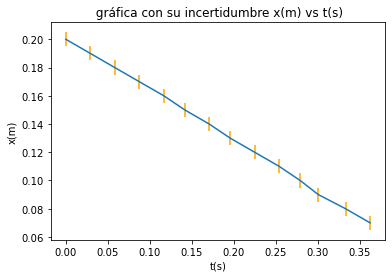

In [8]:
#punto 6, análisis de la velocidad del carrito cuando retrocede
#ajuste lineal y gráfica de la situación de velocidad constante del disco, utilizamos esto para concluir experimentalmente
#sobre el trabajo realizado(el mecánismo que frena el carro, dejando pasar el disco) por el mecánismo sobre el carro.
print('Haciendo una ajuste lineal (el mejor ajuste de acuerdo al fenómeno y los datos es el lineal.):')
fig,ax=plt.subplots()
def func(x, m, b):
    return m*x+b
ajuste,covarianza= curve_fit(func,datos3['t(s)'].tolist(),datos3['x(m)'].tolist())
desviacionestandar=np.sqrt(np.diag(covarianza))
m=round(ajuste[0],2)
b=round(ajuste[1],2)
Δm=round(desviacionestandar[0],3)
Δb=round(desviacionestandar[1],4)
print('El ajuste es x(t)=mt+b,tiene como parametros:')
print(' ')
print(str('m=(')+str(m)+str('+-')+str(Δm)+str(')m/s,'),str('b=(')+str(b)+str('+-')+str(Δb)+str(')m.'))
print(' ')
print('Del MR, la velocidad es igual a m')
print(' ')
print('Por ende la velocidad del carro(v) del choque es:(',m,'+-',Δm,')m/s')
print('La velocidad negativa indica que el carro esta retrociendo')
print('----------------------------------')
print('Gráficando y comparando con los puntos obtenidos por los datos, tenemos:')
x1=datos3['t(s)'].tolist()[0]
x2=datos3['t(s)'].tolist()[-1]
x=np.linspace(x1,x2,1000)
ax.plot(x,func(x,m,b),color='red')
ax.scatter(datos3['t(s)'],datos3['x(m)'],color='blue')
ax.set_title('ajuste lineal x(m) vs t(s)')
ax.set_ylabel('x(m)')
ax.set_xlabel('t(s)')

fig,ax=plt.subplots()
ax.errorbar(datos3['t(s)'],datos3['x(m)'],xerr=Δt,yerr=Δx,ecolor='orange')
ax.set_title(' gráfica con su incertidumbre x(m) vs t(s)')
ax.set_ylabel('x(m)')
ax.set_xlabel('t(s)')